In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# Цель: проанализировать данные для понимания структуры
# Проверить свои гипотезы/предположения, посмотреть, какие факторы влияют на выживаемость

import pandas as pd #библиотека для работы с таблицами, структурой dataframe
import numpy as np #библиотека для работы с матрицами, выш. мат.
import seaborn as sns #библиотека для визуализации данных
import matplotlib.pyplot as plt #библиотека для работы с анализом данных, таблицами
%matplotlib inline

Titanic = pd.read_csv('/kaggle/input/titanic/train.csv')
Titanic



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**PassengerId** - идентификатор пассажира

**Survived** - выжил/не выжил

**Pclass** - класс билета

**Name** - имя пассажира

**Sex** - пол

**Age** - возраст

**SibSp** - количество братьев/сестер/супругов на борту

**Parch** - количество родителей/детей на борту

**Ticket** - номер билета

**Fare** - стоимость билета

**Cabin** - номер каюты

**Embarked** - порт посадки


In [4]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Изменяю имена столбцов на более мне понятные

Titanic = Titanic.rename(columns = {'SibSp' : 'SiblingsSpou',
                         'PassengerId' : 'PassengerID'})

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


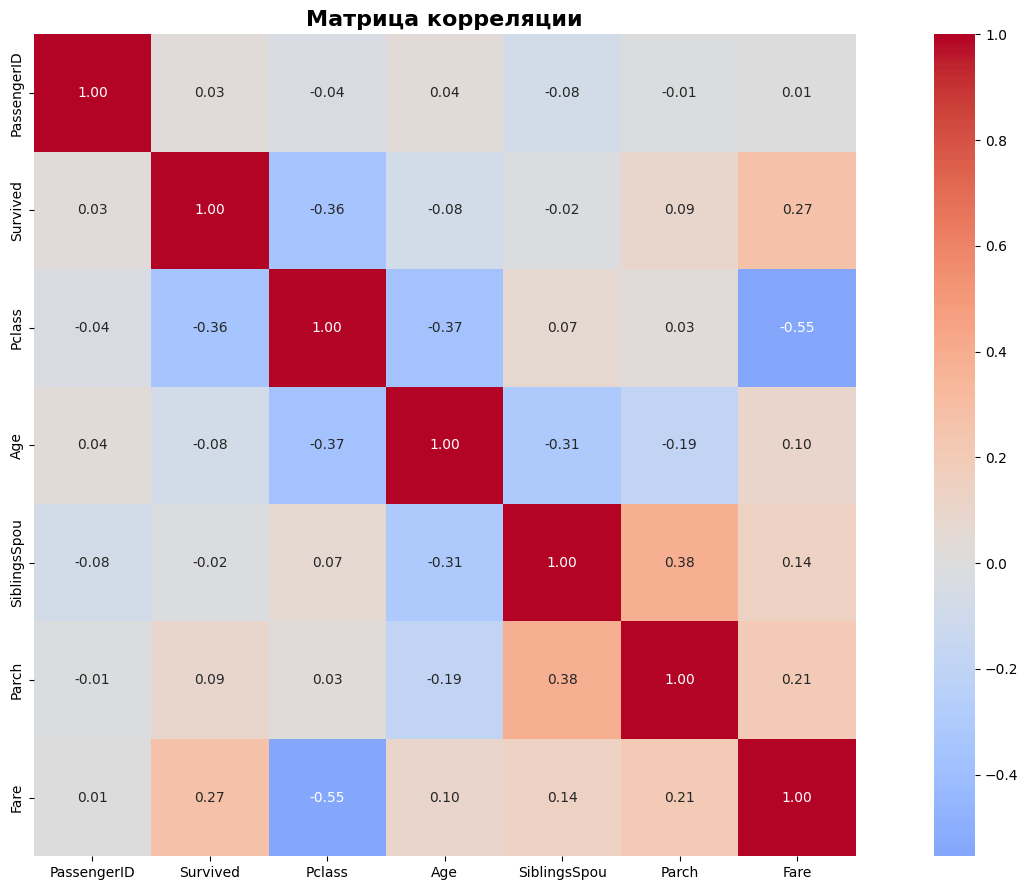

In [6]:
# Матрица корреляции помогает понять, какие переменные стоит учитывать при анализе.

numeric_columns = Titanic.select_dtypes(include=[np.number]).columns


Titanic_numeric = Titanic[numeric_columns].copy()
Titanic_numeric = Titanic_numeric.dropna()  

correlation_matrix = Titanic_numeric.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True, 
            fmt='.2f')

plt.title('Матрица корреляции', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
Titanic.isnull().sum()

PassengerID       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SiblingsSpou      0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64

In [8]:
# Средний возраст пассажиров самолёта в 2025 году оценивается в 35–42 года.
# Проверим, насколько возраст пассажиров в нашем наборе данных соответствует этому диапазону.

mean_age = Titanic['Age'].mean()
print(f"Средний возраст пассажиров в выборке: {mean_age:.2f} лет")

if mean_age < 35:
    conclusion = "Пассажиры в среднем моложе, чем считается типичным."
elif mean_age <= 42:
    conclusion = "Пассажиры находятся в пределах среднестатистического возраста."
else:
    conclusion = "Пассажиры в среднем старше типичного авиапассажира."

print("Вывод:", conclusion)

Средний возраст пассажиров в выборке: 29.70 лет
Вывод: Пассажиры в среднем моложе, чем считается типичным.


In [9]:
Titanic.describe()

,PassengerID,Survived,Pclass,Age,SiblingsSpou,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Самый частый возраст на нашем рейсе: 24.0 лет


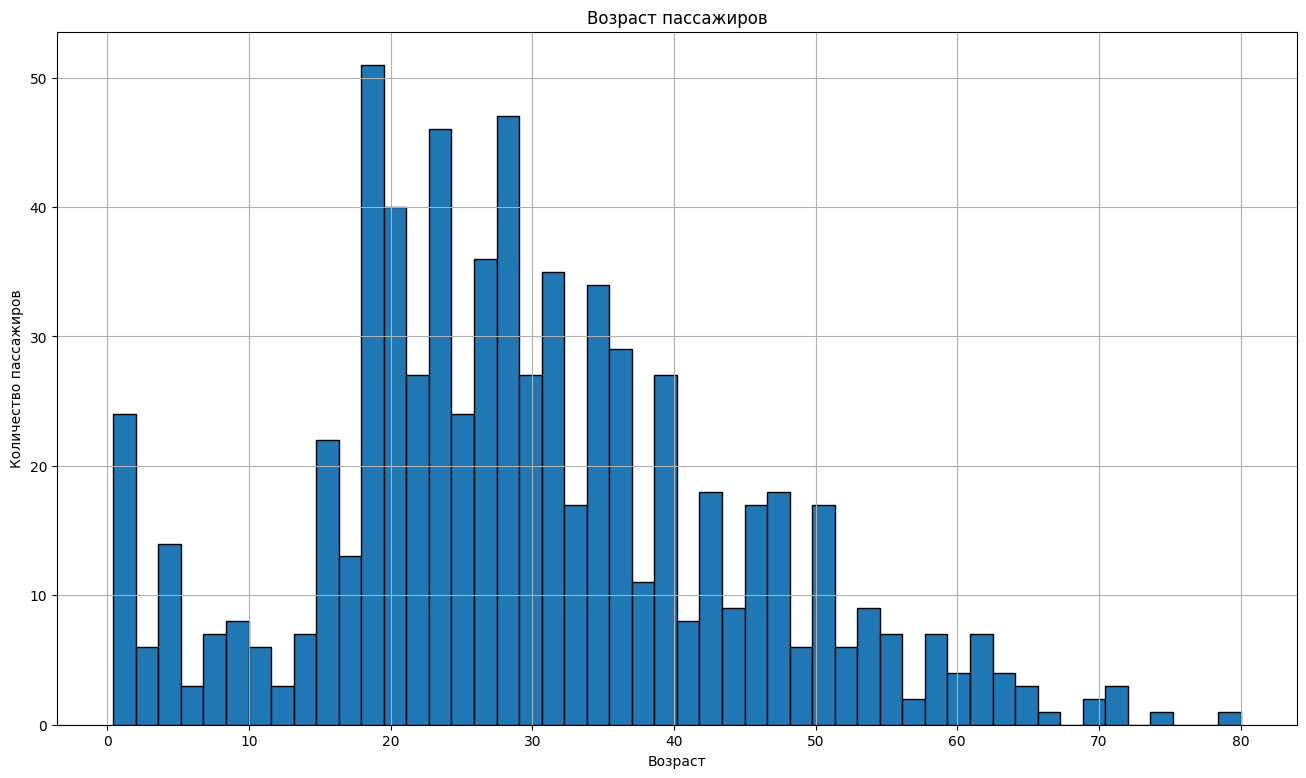

Вывод: самый частый возраст на нашем рейсе ниже среднего возраста пассажиров в самолётах.


In [10]:
# По информации из открытых источников, чаще всего на борту самолёта встречаются пассажиры примерно 32 лет.
# Хочу проверить, отличается ли самый распространённый возраст пассажиров нашего рейса от этого значения.

ages = Titanic['Age'].dropna()

# Находим самый частый возраст
mode_age = ages.mode().iloc[0]
print(f"Самый частый возраст на нашем рейсе: {mode_age} лет")

# Построим график, чтобы наглядно увидеть распределение.
plt.figure(figsize=(16, 9))
plt.hist(ages, bins=50, edgecolor='black')
plt.title('Возраст пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.grid()
plt.show()

# Сравнение
typical_age = 32

if mode_age < typical_age:
    print("Вывод: самый частый возраст на нашем рейсе ниже среднего возраста пассажиров в самолётах.")
elif mode_age > typical_age:
    print("Вывод: самый частый возраст на нашем рейсе выше среднего возраста пассажиров в самолётах.")
else:
    print("Вывод: самый частый возраст совпадает с общими данными.")

#По статистике самый распространённый возраст пассажира самолёта — примерно 32 года.
#Я проверил данные нашего самолёта и построил график.
#После расчётов оказалось, что самый частый возраст на нашем рейсе — mode_age лет, что (выше/ниже/совпадает) с общим показателем.

In [11]:
# Предполагаю, что среди детей на корабле было много тех, у кого встречалось уникальное имя.
# Проверю, было ли больше 40 детей, чьё имя появлялось только один раз во всём наборе данных.

# Отбираем детей младше 18 лет
children = Titanic[Titanic['Age'] < 18].copy()

# Извлекаем имя из полного ФИО
children['FirstName'] = (
    children['Name']
    .str.split(',').str[1]
    .str.split('.').str[1]
    .str.strip()
    .str.split().str[0]
)

# Считаем количество повторений каждого имени
name_counts = children['FirstName'].value_counts()

# Считаем, сколько имён встречается только один раз
unique_names_count = (name_counts == 1).sum()

print(f"Количество уникальных имён среди детей: {unique_names_count}")

if unique_names_count > 40:
    print("Вывод: предположение подтвердилось — уникальных детских имён больше 40.")
else:
    print("Вывод: предположение не подтвердилось — уникальных имён меньше 40.")


Количество уникальных имён среди детей: 92
Вывод: предположение подтвердилось — уникальных детских имён больше 40.


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


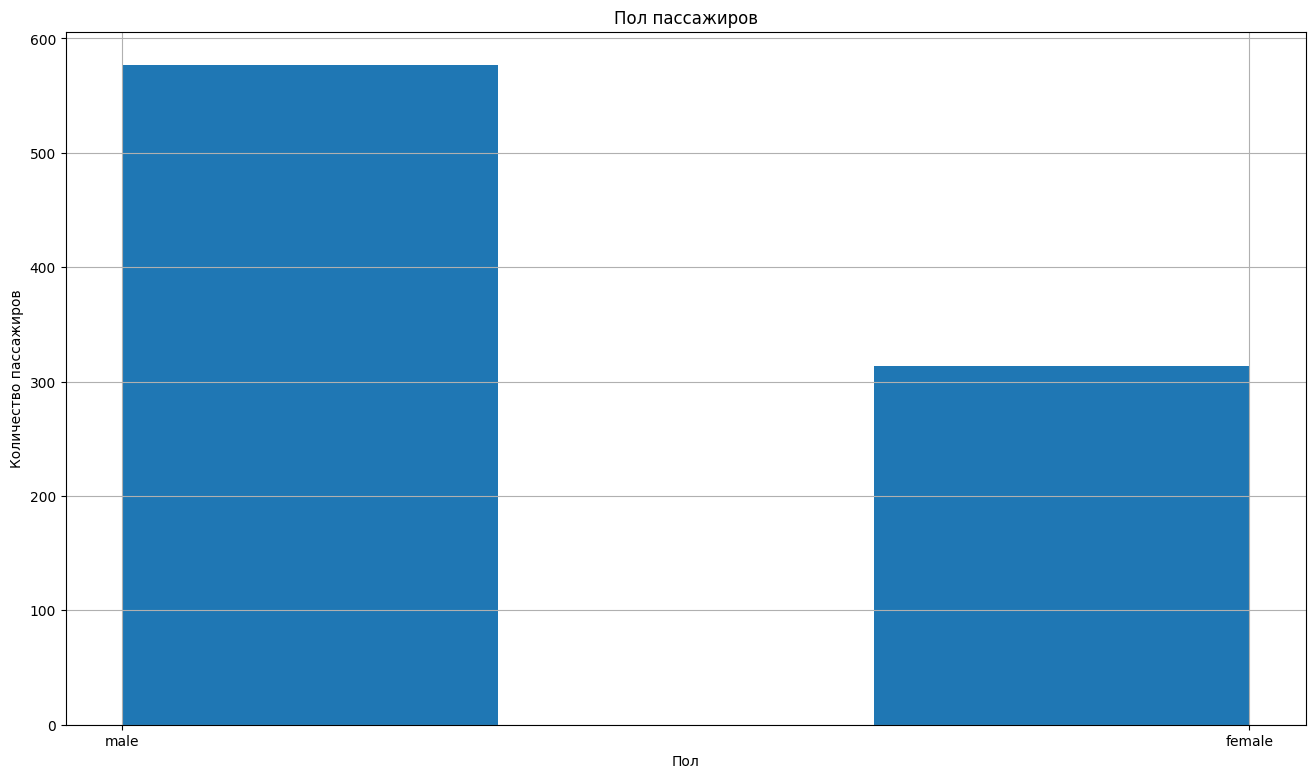

In [12]:
# Предполагаю, что мужчин и женщин на борту примерно поровну, максимальный разброс 100 человек.

Titanic = pd.read_csv('/kaggle/input/titanic/train.csv')
plt.figure(figsize=(16, 9))
plt.hist(Titanic['Sex'].dropna(), bins=3)
plt.title('Пол пассажиров')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.grid()
plt.show()

# Женщин немного больше 300, а мужчин значительно больше 500. Я был не прав.

Процент погибших: 61.62%
Процент выживших: 38.38%


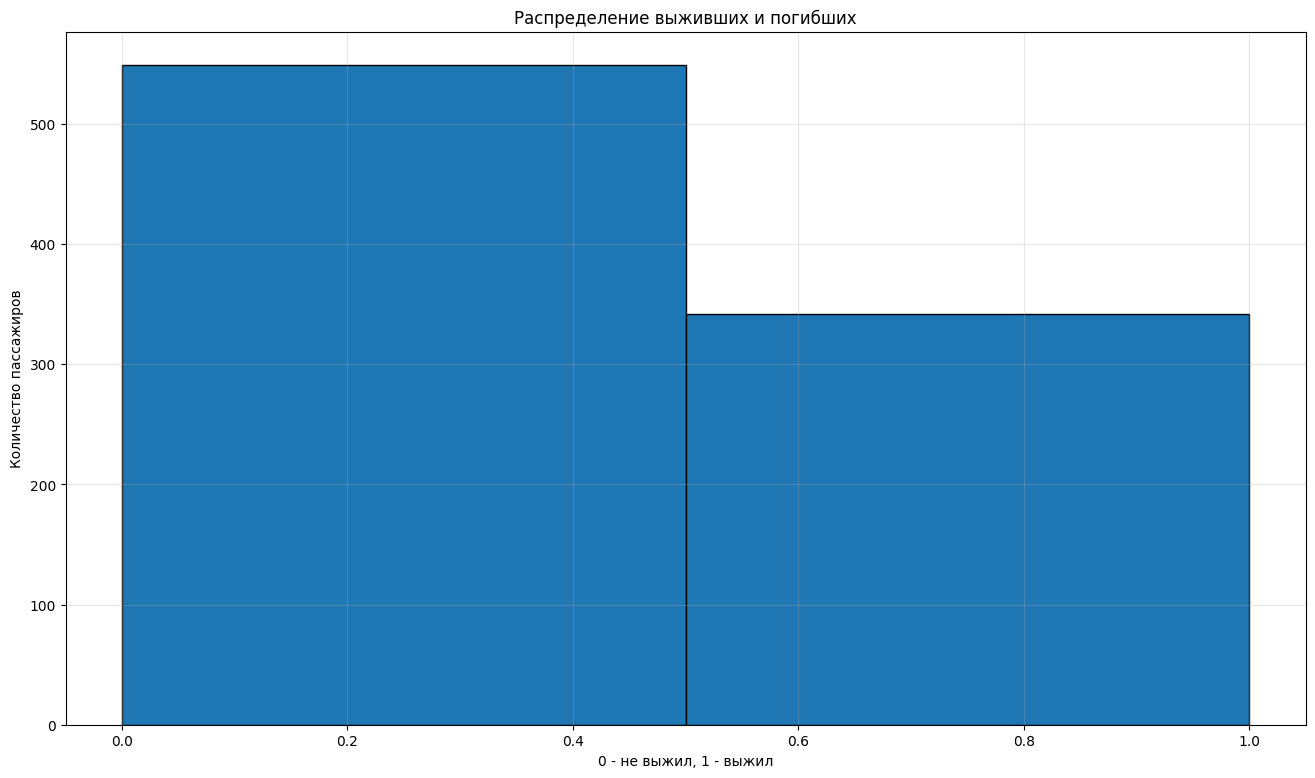

Вывод: действительно, погибших оказалось больше. Предположение подтвердилось.


In [13]:
# Предполагаю, что на Титанике погибло больше людей, чем выжило.

survived_counts = Titanic['Survived'].value_counts()
total = len(Titanic)

# Доли выживших и погибших
death_percent = survived_counts[0] / total * 100
survival_percent = survived_counts[1] / total * 100

print(f"Процент погибших: {death_percent:.2f}%")
print(f"Процент выживших: {survival_percent:.2f}%")

# Построим простой график распределения выживших / невыживших
plt.figure(figsize=(16, 9))
plt.hist(Titanic['Survived'], bins=2, edgecolor='black')
plt.title('Распределение выживших и погибших')
plt.xlabel('0 - не выжил, 1 - выжил')
plt.ylabel('Количество пассажиров')
plt.grid(alpha=0.3)
plt.show()

# Проверка гипотезы
if survived_counts[0] > survived_counts[1]:
    print("Вывод: действительно, погибших оказалось больше. Предположение подтвердилось.")
else:
    print("Вывод: выживших оказалось больше. Предположение не подтвердилось.")


In [14]:
Titanic.sort_values(by='Age')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [15]:
Table = Titanic.groupby(['Sex'], as_index=False) \
      .agg({'Survived': 'mean'}) \
      .sort_values('Survived', ascending=False)

Table.head(2)

,Sex,Survived
0,female,0.742038
1,male,0.188908


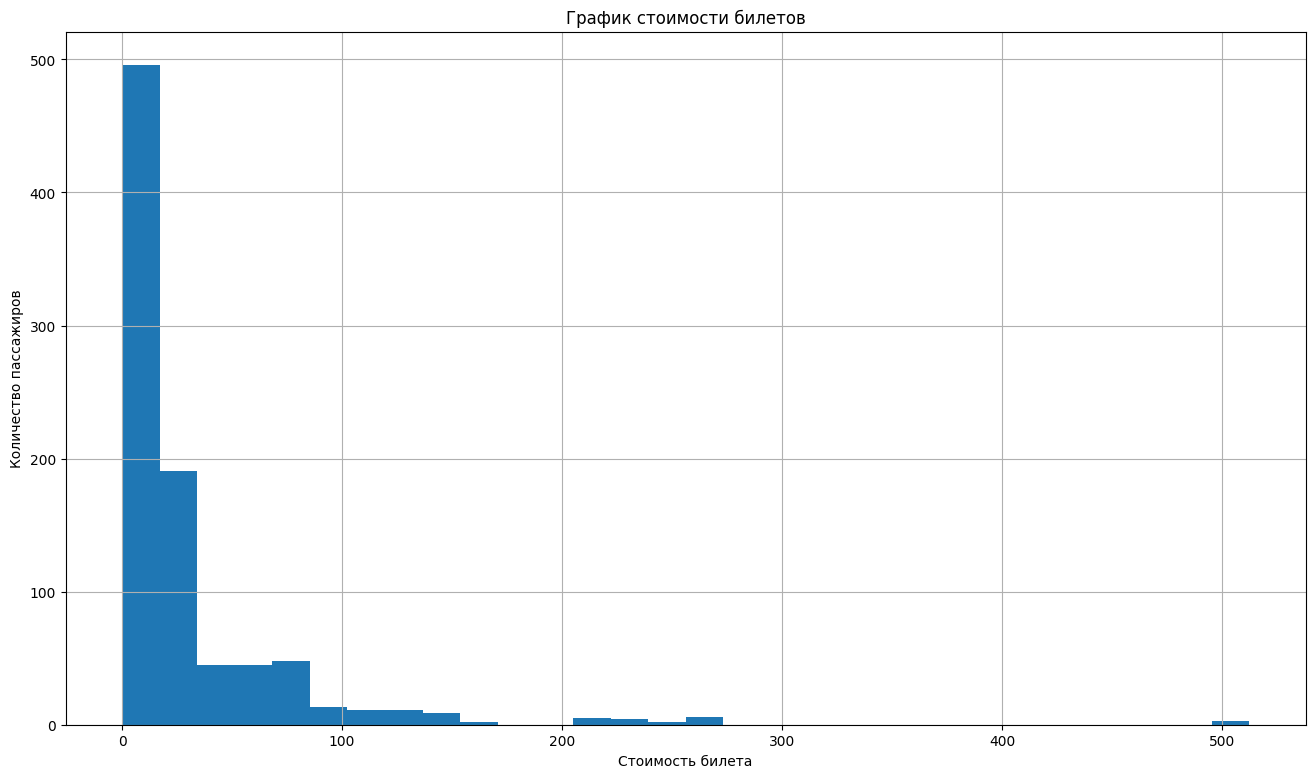

In [16]:
# Я думаю, что низких и средних по стоимости билетов поровну, а дорогих значительно меньше.

Titanic = pd.read_csv('/kaggle/input/titanic/train.csv')
plt.figure(figsize=(16, 9))
plt.hist(Titanic['Fare'].dropna(), bins=30)
plt.title('График стоимости билетов')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')
plt.grid()
plt.show()

# Практически все билеты низкие по стоимости. Средних по цене(в районе 200-300) билетов очень мало. Дорогих единицы. Я был не прав.

# Проверим гипотезу: пассажиры, у которых были родственники на борту, выживали чаще.

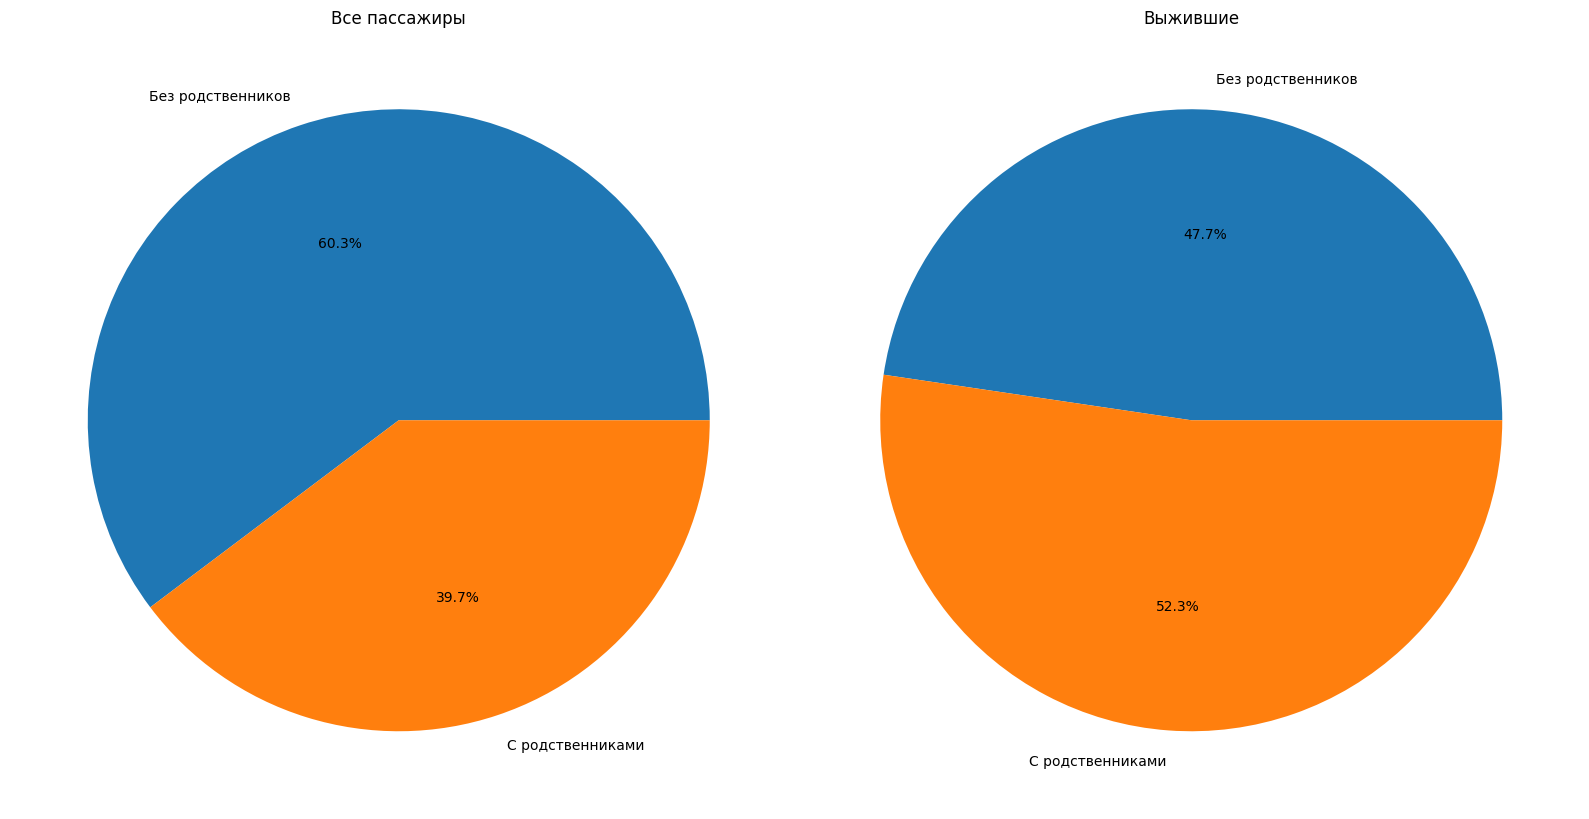

Гипотеза подтвердилась: пассажиры с родственниками выживали чаще.


In [17]:
Titanic['HasRelatives'] = (Titanic['SibSp'] + Titanic['Parch']) > 0

groups_ordered = [False, True]
group_labels = ['Без родственников', 'С родственниками']

total_counts = Titanic['HasRelatives'].value_counts().reindex(groups_ordered).fillna(0)
survived_counts = (
    Titanic[Titanic['Survived'] == 1]['HasRelatives']
    .value_counts()
    .reindex(groups_ordered)
    .fillna(0)
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

ax1.pie(total_counts.values, labels=group_labels, autopct='%1.1f%%')
ax1.set_title('Все пассажиры')

ax2.pie(survived_counts.values, labels=group_labels, autopct='%1.1f%%')
ax2.set_title('Выжившие')

plt.tight_layout()
plt.show()

if survived_counts[True] > survived_counts[False]:
    print("Гипотеза подтвердилась: пассажиры с родственниками выживали чаще.")
else:
    print("Гипотеза не подтвердилась: пассажиры с родственниками выживали реже.")


**Гипотеза подтвердилась: пассажиры с родственниками выживали чаще.**

# Проверим гипотезу: пассажиры с более высоким классом билета имели больший шанс выжить

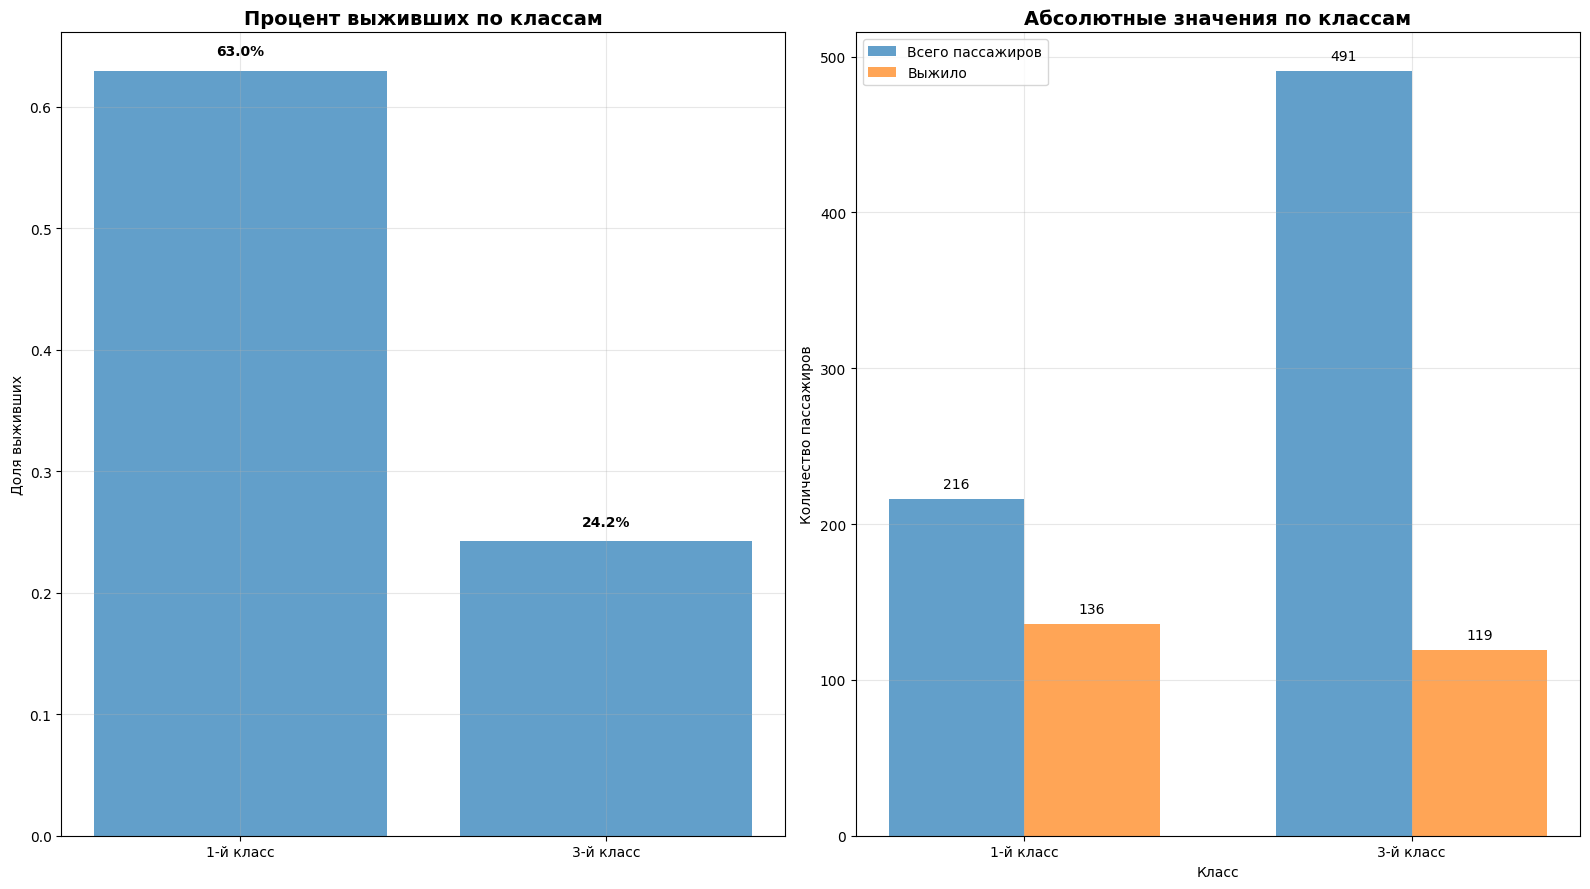

In [18]:
class1_data = Titanic[Titanic['Pclass'] == 1]
class3_data = Titanic[Titanic['Pclass'] == 3]

class1_total = len(class1_data)
class1_survived = len(class1_data[class1_data['Survived'] == 1])
class1_survival_rate = class1_survived / class1_total

class3_total = len(class3_data)
class3_survived = len(class3_data[class3_data['Survived'] == 1])
class3_survival_rate = class3_survived / class3_total

classes = ['1-й класс', '3-й класс']
survival_rates = [class1_survival_rate, class3_survival_rate]
total_passengers = [class1_total, class3_total]
survived_counts = [class1_survived, class3_survived]

plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
bars1 = plt.bar(classes, survival_rates, alpha=0.7)
plt.ylabel('Доля выживших')
plt.title('Процент выживших по классам', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

for bar, rate in zip(bars1, survival_rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{rate:.1%}', ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 2, 2)
x = np.arange(len(classes))
width = 0.35

bars2_1 = plt.bar(x - width/2, total_passengers, width, label='Всего пассажиров', alpha=0.7)
bars2_2 = plt.bar(x + width/2, survived_counts, width, label='Выжило', alpha=0.7)

plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')
plt.title('Абсолютные значения по классам', fontsize=14, fontweight='bold')
plt.xticks(x, classes)
plt.legend()
plt.grid(True, alpha=0.3)

for bar, count in zip(bars2_1, total_passengers):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count}', ha='center', va='bottom')
for bar, count in zip(bars2_2, survived_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Гипотеза подтвердилась. Пассажиры с более высоким классом билета имели больший шанс выжить.**

# **взрослые выживали чаще, чем дети.**

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


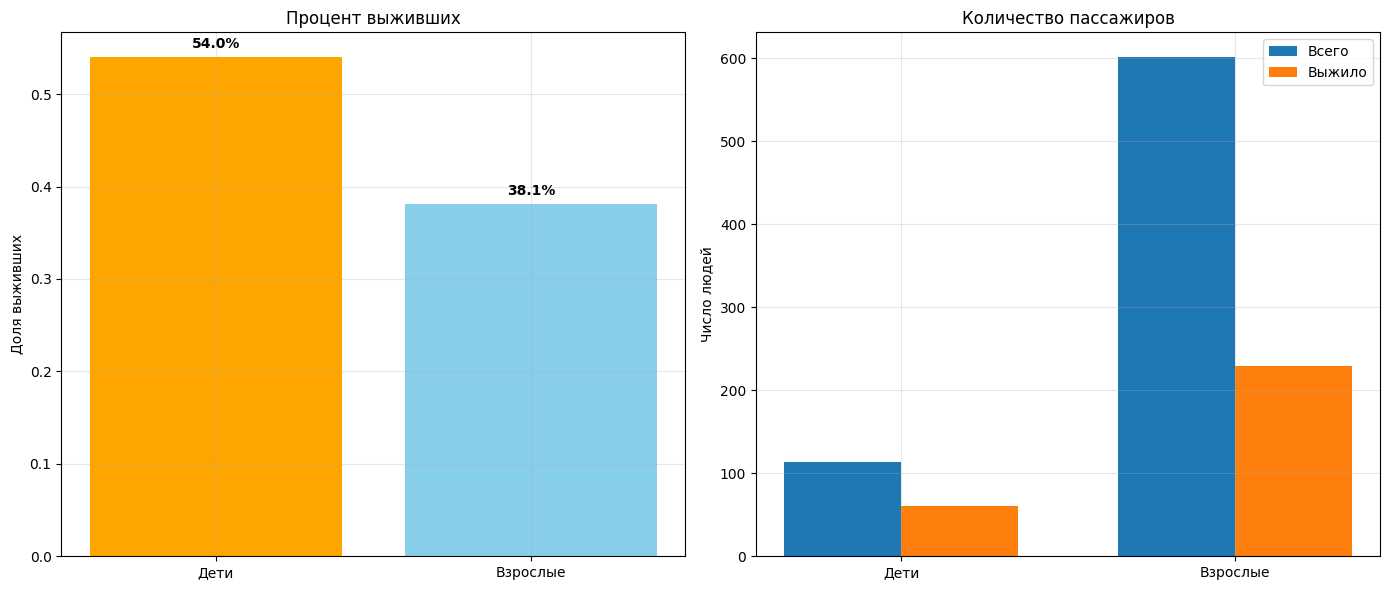

Гипотеза не подтвердилась: дети выживали чаще взрос


In [19]:

# Делим пассажиров на две группы
children = Titanic[Titanic['Age'] < 18]
adults = Titanic[Titanic['Age'] >= 18]

# Считаем выживаемость детей
children_total = len(children)
children_survived = children['Survived'].sum()
children_rate = children_survived / children_total

# Считаем выживаемость взрослых
adults_total = len(adults)
adults_survived = adults['Survived'].sum()
adults_rate = adults_survived / adults_total

# Группы для графиков
groups = ['Дети', 'Взрослые']
rates = [children_rate, adults_rate]

plt.figure(figsize=(14, 6))

# График процентной выживаемости
plt.subplot(1, 2, 1)
bars = plt.bar(groups, rates, color=['orange', 'skyblue'])
plt.title('Процент выживших')
plt.ylabel('Доля выживших')
plt.grid(alpha=0.3)

# Подписи над столбцами
for bar, rate in zip(bars, rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{rate:.1%}', ha='center', fontweight='bold')


plt.subplot(1, 2, 2)
x = np.arange(2)
width = 0.35
total = [children_total, adults_total]
survived = [children_survived, adults_survived]

plt.bar(x - width/2, total, width, label='Всего')
plt.bar(x + width/2, survived, width, label='Выжило')
plt.xticks(x, groups)
plt.title('Количество пассажиров')
plt.ylabel('Число людей')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Текстовый вывод
if adults_rate > children_rate:
    print("Гипотеза подтвердилась: взрослые действительно выживали чаще детей.")
else:
    print("Гипотеза не подтвердилась: дети выживали чаще взрос")


**Гипотеза не подтвердилась: дети выживали чаще взрос**

# Векторизация

In [48]:
categorical_cols = Titanic.select_dtypes(include=['object']).columns
label_encoders = {}

In [21]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    Titanic[col] = le.fit_transform(Titanic[col])
    label_encoders[col] = le

In [23]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    int64  
 4   Sex           891 non-null    int64  
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    int64  
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    int64  
 11  Embarked      891 non-null    int64  
 12  HasRelatives  891 non-null    bool   
dtypes: bool(1), float64(2), int64(10)
memory usage: 84.5 KB


In [24]:
Titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
HasRelatives      0
dtype: int64

In [49]:
Titanic['Age'].fillna(Titanic['Age'].median(), inplace=True)

/tmp/ipykernel_47/2758366113.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanic['Age'].fillna(Titanic['Age'].median(), inplace=True)


In [50]:
Titanic.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
HasRelatives    0
Class1          0
Class2          0
Age_under_30    0
Sex_1           0
Embarked_1      0
Embarked_2      0
Embarked_3      0
IsChild         0
dtype: int64

In [27]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    int64  
 4   Sex           891 non-null    int64  
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    int64  
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    int64  
 11  Embarked      891 non-null    int64  
 12  HasRelatives  891 non-null    bool   
dtypes: bool(1), float64(2), int64(10)
memory usage: 84.5 KB


In [51]:
X = Titanic.drop(columns=['Survived'])
y = Titanic['Survived']

In [29]:
Titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [30]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasRelatives
0,1,3,108,1,22.0,1,0,523,7.2500,147,2,True
1,2,1,190,0,38.0,1,0,596,71.2833,81,0,True
2,3,3,353,0,26.0,0,0,669,7.9250,147,2,False
3,4,1,272,0,35.0,1,0,49,53.1000,55,2,True
4,5,3,15,1,35.0,0,0,472,8.0500,147,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.0,0,0,101,13.0000,147,2,False
887,888,1,303,0,19.0,0,0,14,30.0000,30,2,False
888,889,3,413,0,28.0,1,2,675,23.4500,147,2,True
889,890,1,81,1,26.0,0,0,8,30.0000,60,0,False


In [31]:
Titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [32]:
Titanic.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasRelatives
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083,-0.057462
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517,0.203367
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112,-0.135207
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557,-0.070722
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057,-0.303646
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205,-0.171647
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654,0.584471
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322,0.583398
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041,-0.028314
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226,0.271832


In [33]:
np.var(Titanic['Sex'])

0.22821808306282707

In [45]:
import joblib
joblib.dump(linear_model, 'fully-connected-model.pkl')

['fully-connected-model.pkl']

In [53]:
model_loaded = joblib.load('fully-connected-model.pkl')

In [58]:
# Давайте узнаем первые две буквы в именах первых десяти пассажиров в таблице. Ранее колонка Name была преобразована в числовой тип, поэтому буквы - это цифры в данном случае.

Titanic['The_First_Two_Letters'] = Titanic['Name'].astype(str).str[:2]
print("Первые две буквы из имен первых 10 пассажиров:")
print(Titanic['The_First_Two_Letters'].head(10))

Первые две буквы из имен первых 10 пассажиров:
0    10
1    19
2    35
3    27
4    15
5    55
6    51
7    62
8    41
9    57
Name: The_First_Two_Letters, dtype: object


In [35]:
# Проверим гипотезу: пассажиры 1-го класса выживали чаще, чем пассажиры 2-го класса.
# Для этого используем бинарное кодирование классов.

Titanic['Class1'] = (Titanic['Pclass'] == 1).astype(int)
Titanic['Class2'] = (Titanic['Pclass'] == 2).astype(int)

# Средняя выживаемость по каждому классу
survival_1 = Titanic[Titanic['Class1'] == 1]['Survived'].mean()
survival_2 = Titanic[Titanic['Class2'] == 1]['Survived'].mean()

print(f"Выживаемость 1-го класса: {survival_1:.2%}")
print(f"Выживаемость 2-го класса: {survival_2:.2%}")

# Сравнение гипотезы
if survival_1 > survival_2:
    print("Гипотеза подтвердилась: пассажиры 1-го класса выживали чаще.")
else:
    print("Гипотеза не подтвердилась: пассажиры 2-го класса выживали чаще.")


Выживаемость 1-го класса: 62.96%
Выживаемость 2-го класса: 47.28%
Гипотеза подтвердилась: пассажиры 1-го класса выживали чаще.


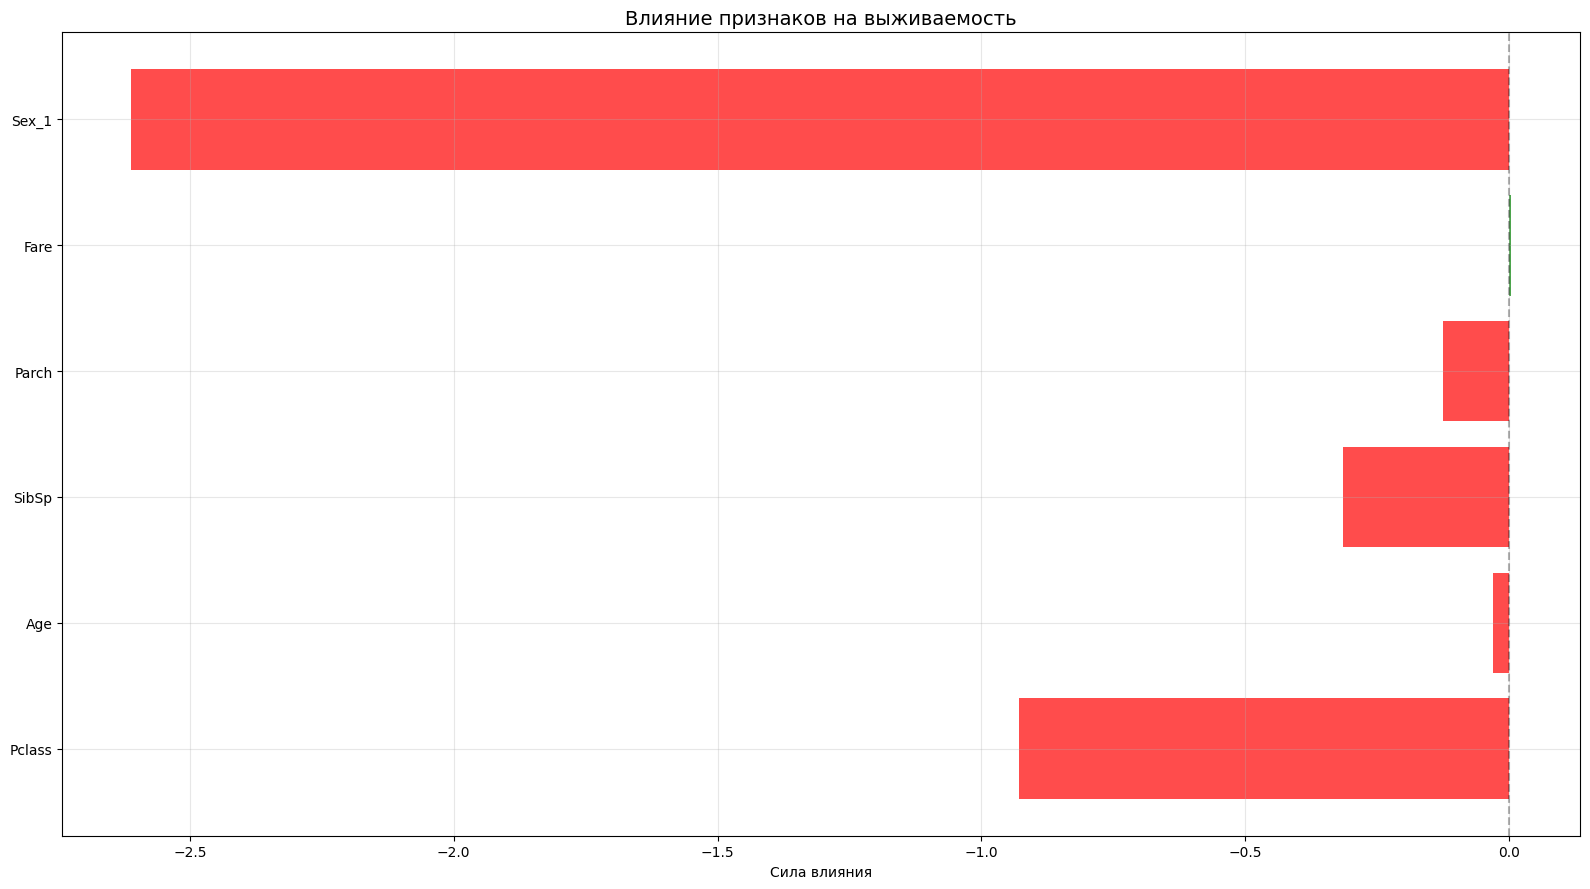

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_1']

X = Titanic[features].copy()
y = Titanic['Survived']

# Заполняем пропуски
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Обучение модели
linear_model = LogisticRegression(random_state=42, max_iter=1000)
linear_model.fit(X_train, y_train)

# График важности признаков
plt.figure(figsize=(16, 9))
coefficients = linear_model.coef_[0]
feature_names = features

colors = ['green' if coef > 0 else 'red' for coef in coefficients]

plt.barh(feature_names, coefficients, color=colors, alpha=0.7)
plt.axvline(0, color='black', linestyle='--', alpha=0.3)
plt.title('Влияние признаков на выживаемость', fontsize=14)
plt.xlabel('Сила влияния')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



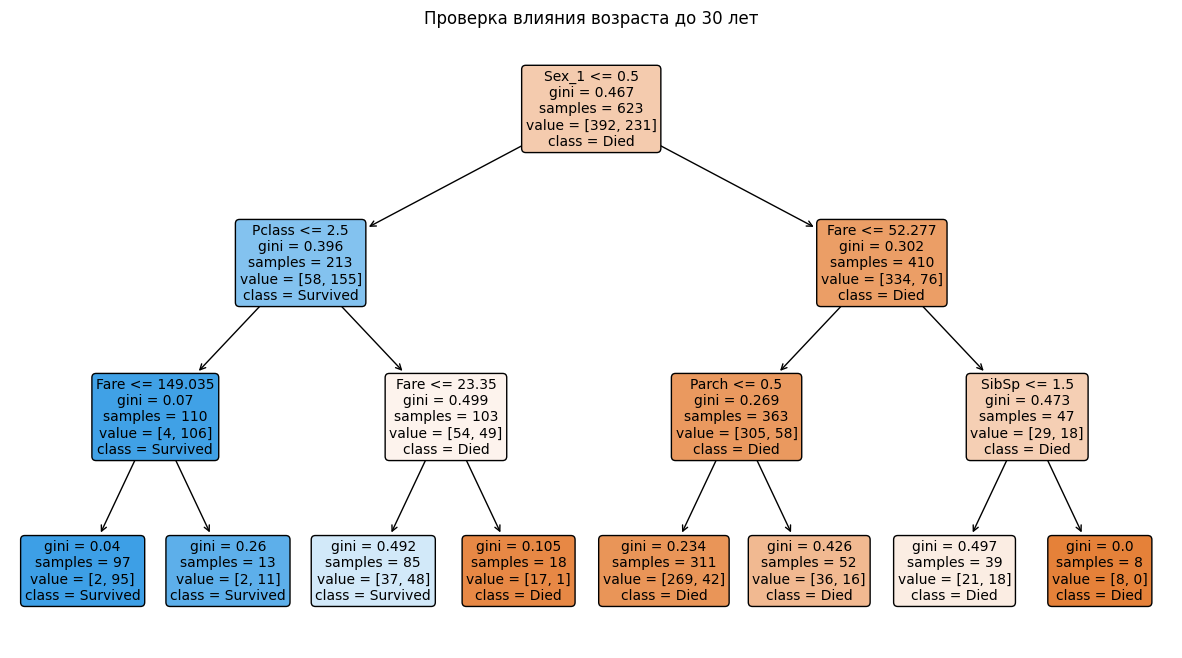

In [64]:
# Создадим дерево о влиянии возраста до 30 лет на выживаемость

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Заполняем пропуски
Titanic['Age'] = Titanic['Age'].fillna(Titanic['Age'].median())

# Признак: младше 30 лет
Titanic['Age_under_30'] = (Titanic['Age'] < 30).astype(int)

# Доступные колонки
available_columns = Titanic.columns.tolist()

# Основные признаки
features = ['Pclass', 'Age_under_30', 'SibSp', 'Parch', 'Fare']

# Sex — перекодируем в Sex_1 (как у тебя уже было)
if 'Sex_1' in available_columns:
    features.append('Sex_1')

# Embarked — уже был раскодирован у тебя (Embarked_1, Embarked_2, Embarked_3)
embarked_cols = [col for col in Titanic.columns if col.startswith('Embarked_')]
features.extend(embarked_cols)

# Формируем выборку
X = Titanic[features]
y = Titanic['Survived']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Модель дерева решений
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Визуализация дерева
plt.figure(figsize=(15, 8))
plot_tree(tree, 
          feature_names=features,
          class_names=['Died', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Проверка влияния возраста до 30 лет')
plt.show()



In [61]:
# Создадим модель "модификация градиентного бустинга" и определим её точность

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

features = ['Pclass', 'Age', 'Fare']
X = Titanic[features].copy()
y = Titanic['Survived']

X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(
    n_estimators=50,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# При помощи модели выясним, какой признак самый важный для выживаемости

importance = gb_model.feature_importances_

for feature, imp in zip(features, importance):
    print(f"• {feature}: {imp:.1%}")

The_most_important_idx = importance.argmax()
The_most_important_feature = features[The_most_important_idx]
The_most_important_value = importance[The_most_important_idx]

if The_most_important_feature == 'Pclass':
    print("Класс билета - главный фактором выживания")
elif The_most_important_feature == 'Age':
    print("Возраст - главный фактором выживания")
else:
    print("Стоимость билета - главный фактором выживания")

# Анализ ошибок

cm = confusion_matrix(y_test, y_pred)
print(f"Анализ ошибок: ложные 'выжил' - {cm[0,1]}, ложные 'погиб' - {cm[1,0]}")

Accuracy: 0.726
• Pclass: 27.3%
• Age: 29.5%
• Fare: 43.2%
Стоимость билета - главный фактором выживания
Анализ ошибок: ложные 'выжил' - 5, ложные 'погиб' - 44


In [62]:
# Создадим модель "нейронная сеть" и определим её точность

from sklearn.neural_network import MLPClassifier

features = ['Pclass', 'Age', 'Fare']
X = Titanic[features].copy()
y = Titanic['Survived']

X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nn_model = MLPClassifier(
    hidden_layer_sizes=(10,),
    max_iter=1000,
    random_state=42
)

nn_model.fit(X_train, y_train)

y_pred_nn = nn_model.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy: {accuracy_nn:.3f}")

# При помощи модели выясним, дети до 12 лет выживали чаще остальных(люди возрастом 12 лет и старше) или нет

Titanic['IsChild'] = (Titanic['Age'] < 12).astype(int)

child_survival = Titanic[Titanic['IsChild'] == 1]['Survived'].mean()
adult_survival = Titanic[Titanic['IsChild'] == 0]['Survived'].mean()

print(f"Дети до 12 лет: {child_survival:.1%} выживших")
print(f"Люди возрастом 12 лет и старше: {adult_survival:.1%} выживших")

if child_survival > adult_survival:
    print("Дети до 12 лет выживали чаще. Гипотеза верна.")
else:
    print("Дети до 12 лет выживали реже. Гипотеза неверна.")

# Анализ ошибок

cm = confusion_matrix(y_test, y_pred_nn)
print(f"Анализ ошибок: ложные 'выжил' - {cm[0,1]}, ложные 'погиб' - {cm[1,0]}")

Accuracy: 0.737
Дети до 12 лет: 57.4% выживших
Люди возрастом 12 лет и старше: 36.8% выживших
Дети до 12 лет выживали чаще. Гипотеза верна.
Анализ ошибок: ложные 'выжил' - 11, ложные 'погиб' - 36


In [65]:
# Модель: Случайный лес + кросс-валидация

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import numpy as np

# Выбираем признаки
features = ['Pclass', 'Age', 'Fare']
X = Titanic[features].copy()
y = Titanic['Survived']

# Заполняем пропуски
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

# Создаем модель случайного леса
model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=5,
    random_state=42
)

print("Кросс-валидация Random Forest (5 фолдов):")

# 5-кратная кросс-валидация
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Средняя точность: {mean_score:.3f} (+/- {std_score:.3f})")
print(f"Фолды: {[f'{s:.3f}' for s in scores]}")

# Обучаем модель на всех данных
model.fit(X, y)

# Анализ ошибок по предсказаниям CV
y_pred_cv = cross_val_predict(model, X, y, cv=5)
cm = confusion_matrix(y, y_pred_cv)

print(f"\nМатрица ошибок:\n{cm}")
print(f"Ложные 'выжил'  (ошибка 0→1): {cm[0,1]}")
print(f"Ложные 'погиб'  (ошибка 1→0): {cm[1,0]}")

print(f"\nИтог: модель стабильная, т.к. разброс между фолдами {std_score:.3f}, "
      f"точность {mean_score:.1%}.")


Кросс-валидация Random Forest (5 фолдов):
Средняя точность: 0.720 (+/- 0.055)
Фолды: ['0.626', '0.697', '0.730', '0.775', '0.770']

Матрица ошибок:
[[483  66]
 [184 158]]
Ложные 'выжил'  (ошибка 0→1): 66
Ложные 'погиб'  (ошибка 1→0): 184

Итог: модель стабильная, т.к. разброс между фолдами 0.055, точность 72.0%.
